In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, chi2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import os

In [2]:
def load_data(data_path):
    f = open(data_path)
    features = []
    targets = []
    
    for line in f: 
        split_line = line.split(",")
        target_var = split_line.pop(0)
        features.append([float(x) for x in split_line])
        targets.append(float(target_var))
    f.close()
    features = np.array(features)
    targets = np.array(targets)
    return features, targets

In [3]:
features, targets = load_data("C:/Users/selin/Documents/GitHub/spring2021-hw8-selincetin/YearPredictionMSD.txt")

In [4]:
min_val = np.amin(targets)
max_val = np.amax(targets)

new_years = np.arange(1920, 2016, 5)
new_years = new_years.tolist()

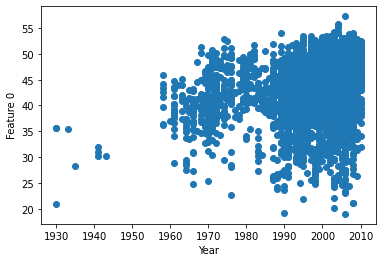

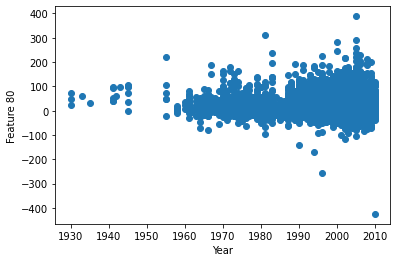

In [6]:
plt.scatter(targets[0:5000], features[0:5000, 0])
plt.xlabel("Year")
plt.ylabel("Feature 0")
plt.figure()
plt.scatter(targets[0:10000], features[0:10000, 80])
plt.xlabel("Year")
plt.ylabel("Feature 80")
plt.show()

In [7]:
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

train_feat = features[0:463715]
train_tar = targets[0:463715]

chi_2, p_values = chi2(train_feat, train_tar)
min_10 = np.argsort(p_values)
min_10 = min_10[0:10]

new_feat = np.empty((features.shape[0], 10))
for ii in range(0, 10):
    new_feat[:,ii] = features[:, min_10[ii]]

train_feat = new_feat[0:463715]
test_feat = new_feat[463715:]
train_tar = targets[0:463715]
test_tar = targets[463715:]
#feat_select = RFE(estimator=KNeighborsRegressor(), n_features_to_select=15, verbose=5)


In [53]:
reg_50_un = KNeighborsRegressor(n_neighbors=50)
reg_50_wei = KNeighborsRegressor(n_neighbors=50, weights='distance')
reg_50_un.fit(train_feat, train_tar)
reg_50_wei.fit(train_feat, train_tar)

KNeighborsRegressor(n_neighbors=50, weights='distance')

In [49]:
#reg = feat_select.fit(train_feat, train_tar)
#reg = LinearRegression().fit(train_feat, train_tar)
reg_50 = KNeighborsRegressor(n_neighbors=50)
reg_75 = KNeighborsRegressor(n_neighbors=75)
reg_100 = KNeighborsRegressor(n_neighbors=100)
reg_50.fit(train_feat, train_tar)
reg_75.fit(train_feat, train_tar)
reg_100.fit(train_feat, train_tar)

KNeighborsRegressor(n_neighbors=100)

In [50]:
#print(r2_score(reg.predict(train_feat), train_tar))
pred_50_tar = reg_50.predict(test_feat)
pred_75_tar = reg_75.predict(test_feat)
pred_100_tar = reg_100.predict(test_feat)

In [54]:
pred_50_tar_un = reg_50_un.predict(test_feat)
pred_50_tar_wei = reg_50_wei.predict(test_feat)

In [51]:
new_pred_tar_50 = np.empty((pred_50_tar.shape))
new_pred_tar_75 = np.empty((pred_75_tar.shape))
new_pred_tar_100 = np.empty((pred_100_tar.shape))
new_test_tar = np.empty((test_tar.shape))
old_tar_vec = [pred_50_tar, pred_75_tar, pred_100_tar, test_tar]
new_tar_vec = [new_pred_tar_50, new_pred_tar_75, new_pred_tar_100, new_test_tar]
 
for kk, vec in enumerate(old_tar_vec):    
    for jj, tar in enumerate(vec):
        for ii, year in enumerate(new_years):
            if tar >= year and tar < (year + 5):
                new_tar_vec[kk][jj] = year 

new_test_tar = new_tar_vec[-1]
new_tar_vec = new_tar_vec[0:-1]
acc_vec = []
rmse_vec = []
for ii, vec in enumerate(new_tar_vec):
    acc_vec.append(np.mean(vec.astype(int) == new_test_tar))
    rmse_vec.append(mean_squared_error(vec, new_test_tar, squared=False))
    

In [56]:
new_pred_tar_un = np.empty((pred_50_tar_un.shape))
new_pred_tar_wei = np.empty((pred_50_tar_wei.shape))
new_test_tar = np.empty((test_tar.shape))
old_tar_vec = [pred_50_tar_un, pred_50_tar_wei, test_tar]
new_tar_vec = [new_pred_tar_wei, new_pred_tar_un, new_test_tar]
 
for kk, vec in enumerate(old_tar_vec):    
    for jj, tar in enumerate(vec):
        for ii, year in enumerate(new_years):
            if tar >= year and tar < (year + 5):
                new_tar_vec[kk][jj] = year 

new_test_tar = new_tar_vec[-1]
new_tar_vec = new_tar_vec[0:-1]
acc_vec = []
rmse_vec = []
for ii, vec in enumerate(new_tar_vec):
    acc_vec.append(np.mean(vec.astype(int) == new_test_tar))
    rmse_vec.append(mean_squared_error(vec, new_test_tar, squared=False))
    
print(rmse_vec)
print(acc_vec)

[9.750817543459307, 9.750072631920053]
[0.25388340112337787, 0.25438698431144685]


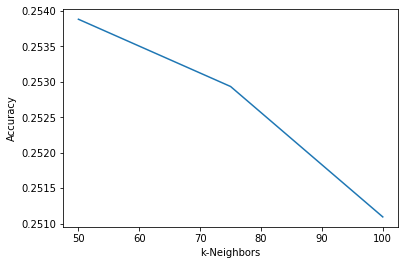

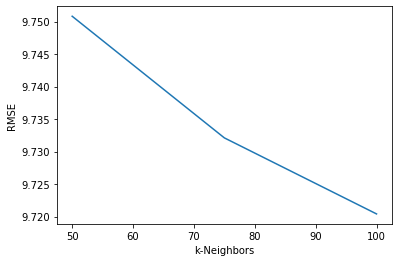

In [52]:
plt.plot([50, 75, 100], acc_vec)
plt.xlabel("k-Neighbors")
plt.ylabel("Accuracy")
plt.figure()
plt.plot([50, 75, 100], rmse_vec)
plt.xlabel("k-Neighbors")
plt.ylabel("RMSE")
plt.show()